In [22]:
import cv2
import numpy as np
from tensorflow.keras.models import model_from_json
import matplotlib.pyplot as plt

In [23]:

# Load Generator model
def load_generator_model(model_json_path, model_weights_path):
    with open(model_json_path, 'r') as json_file:
        loaded_model_json = json_file.read()
    generator_model = model_from_json(loaded_model_json)
    generator_model.load_weights(model_weights_path)
    return generator_model

In [24]:

# Function to preprocess input image
def preprocess_image(image_path):
    img = cv2.imread(image_path).astype("float32")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (256, 256))
    img = img / 255.0
    return img

In [25]:

# Function to generate colorized image
def generate_colorized_image(generator_model, input_image_path):
    input_image = preprocess_image(input_image_path)
    input_image = np.expand_dims(input_image, axis=0)
    colorized_image = generator_model.predict(input_image)
    colorized_image = np.squeeze(colorized_image, axis=0)
    colorized_image = np.clip(colorized_image, 0, 1)  # Clip values to be in the range [0, 1]
    return colorized_image

In [26]:
 
# Load the generator model
generator_model = load_generator_model('modelGenerator.json', 'modelGen.h5')


In [27]:

# Load the sample grayscale image
sample_image_path = './content/Testing3.jpg'


In [28]:

# Generate colorized image
colorized_image = generate_colorized_image(generator_model, sample_image_path)


1/1 [==============================] - 0s 291ms/step


In [29]:

# Save the colorized image
cv2.imwrite('colorized_image.jpg', cv2.cvtColor(colorized_image * 255, cv2.COLOR_RGB2BGR))

True

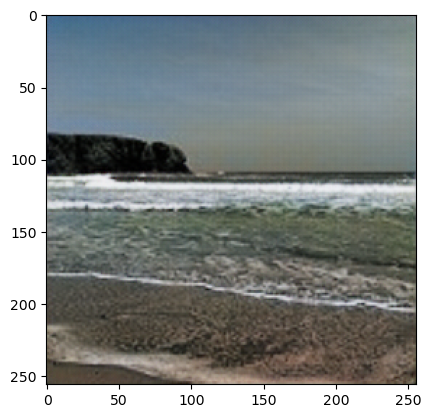

In [30]:
plt.imshow(colorized_image)